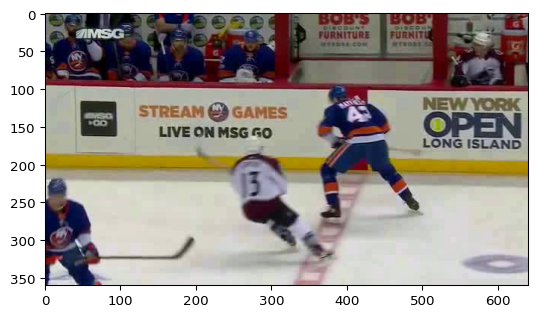

In [5]:
import imageio
import imgaug as ia
%matplotlib inline


image = imageio.imread('./_2017-11-05-col-nyi-home10/frame_0000.png')

image = ia.imresize_single_image(image, (360, 640))
ia.imshow(image)

In [6]:
import json
with open('./_2017-11-05-col-nyi-home10/_2017-11-05-col-nyi-home10.json', 'r') as f:
    pose = json.load(f)

frame_0_pose = pose[0]

In [7]:
keys = set().union(*(d.keys() for d in pose))
keys.remove('frameNum')
all_players = list(keys)
print(all_players)

['p1', 'p5', 'p3', 'p2', 'p4']


In [8]:
# def atoi(text):
#     return int(text) if text.isdigit() else text

# def natural_keys(text):
#     return [ atoi(c) for c in re.split(r'(\d+)', text) ]

# all_players.sort(key=natural_keys)

# print(all_players)


In [9]:
# def atoi(text):
#     return int(text) if text.isdigit() else text
#
# def natural_keys(text):
#     return [ atoi(c) for c in re.split(r'(\d+)', text) ]

In [10]:
from imgaug.augmentables.kps import Keypoint
kps = []

for key in all_players:
    body = frame_0_pose[key]
    for i in range(0,48,3):
#         print(key,i)
        x = body[i]
        y = body[i+1]
        kps.append(Keypoint(x,y))
            
            

In [11]:
# print(kps)

In [12]:
from imgaug.augmentables.kps import Keypoint, KeypointsOnImage

In [13]:
# kps = [
#     Keypoint(x=387.4524, y=109.31219999999999),   # left eye (from camera perspective)
#     Keypoint(x=400.587, y=120.856),
#     Keypoint(x=276.6616, y=177.1174),  # right eye
#     Keypoint(x=270.5, y=196.5),
#     Keypoint(x=0.0, y=0.0), # nose
#     Keypoint(x=0.0, y=0.0),
#     Keypoint(x=16.5, y=240.0), # left paw
#     Keypoint(x=19.5, y=264.0),
#     Keypoint(x=0.0, y=0.0),  # right paw
#     Keypoint(x=0.0, y=0.0)
# ]

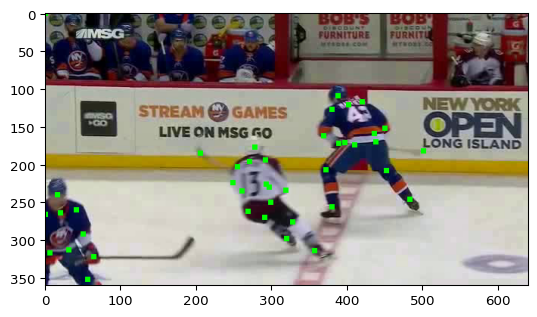

In [14]:
kpsoi = KeypointsOnImage(kps, shape=image.shape)

ia.imshow(kpsoi.draw_on_image(image, size=7))

In [15]:


# print(kpsoi.keypoints)



In [131]:
import imgaug.augmenters as iaa
ia.seed(3)

# seq = iaa.Sequential([
#     iaa.flip.Fliplr(p=1)
#     #iaa.Affine(rotate=(180, 180))
#     #iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
# ])

# seq = iaa.Sequential([
#     iaa.Affine(scale=(0.8,1.2))
#     #iaa.Affine(rotate=(180, 180))
#     #iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
# ])

seq = iaa.Sequential([
   iaa.PerspectiveTransform(scale=(0.06, 0.06))
    #iaa.Affine(rotate=(180, 180))
    #iaa.AddToHueAndSaturation((-50, 50))  # color jitter, only affects the image
])

In [132]:


image_aug, kpsoi_aug = seq(image=image, keypoints=kpsoi)



In [133]:
# print(kpsoi_aug)

In [134]:
# for element1, element2 in zip(kpsoi_aug,kpsoi) :
#     print(element1.x + element2.x)
#     print(element1.y - element2.y)
    
    

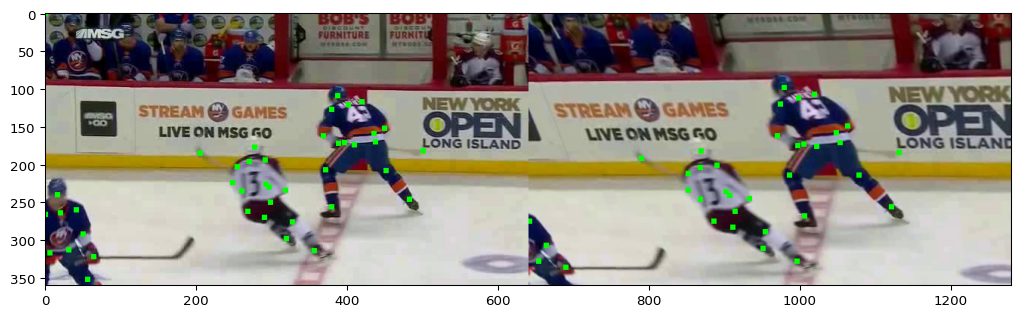

In [135]:
import numpy as np
ia.imshow(
    np.hstack([
        kpsoi.draw_on_image(image, size=7),
        kpsoi_aug.draw_on_image(image_aug, size=7)
    ])
)

/home/fay/miniconda3/envs/env_motus/lib/python3.7/site-packages/imgaug/imgaug.py:110: DeprecationWarning: Using imgaug.imgaug.pad is deprecated. Use imgaug.augmenters.size.pad instead.
  warn(msg, category=DeprecationWarning, stacklevel=stacklevel)


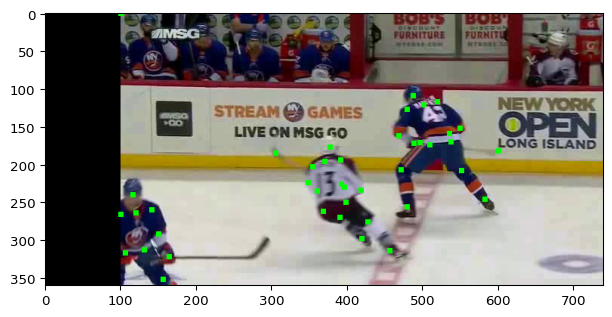

In [22]:
image_pad = ia.pad(image, left=100)
kpsoi_pad = kpsoi.shift(x=100)
ia.imshow(kpsoi_pad.draw_on_image(image_pad, size=7))